In [3]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load data & read using pandas

In [4]:
#import titanic data files

df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/HREmployee.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Attrition'] = le.fit_transform(df.Attrition.values)
df['Attrition'] = df['Attrition'].astype('int64')

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df.BusinessTravel.values)
df['BusinessTravel'] = df['BusinessTravel'].astype('int64')

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Department'] = le.fit_transform(df.Department.values)
df['Department'] = df['Department'].astype('int64')

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['EducationField'] = le.fit_transform(df.EducationField.values)
df['EducationField'] = df['EducationField'].astype('int64')

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df.Gender.values)
df['Gender'] = df['Gender'].astype('int64')

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['JobRole'] = le.fit_transform(df.JobRole.values)
df['JobRole'] = df['JobRole'].astype('int64')

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['MaritalStatus'] = le.fit_transform(df.MaritalStatus.values)
df['MaritalStatus'] = df['MaritalStatus'].astype('int64')

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Over18'] = le.fit_transform(df.Over18.values)
df['Over18'] = df['Over18'].astype('int64')

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['OverTime'] = le.fit_transform(df.OverTime.values)
df['OverTime'] = df['OverTime'].astype('int64')

# Data Statistical Analysis-

In [16]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [17]:
df.shape

(1470, 35)

In [18]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
# Check for skewness : 
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

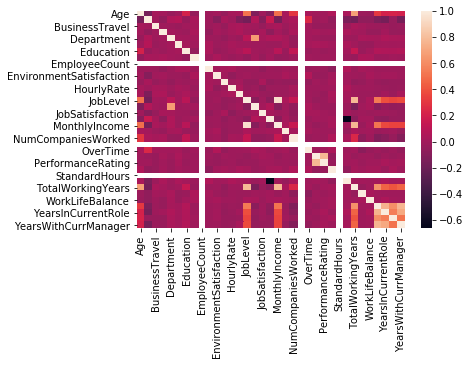

In [20]:
# checking correlation
dfcor=df.corr()
sns.heatmap(dfcor)

In [30]:
import pandas as pd

cols = df.columns.tolist()
print(cols)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# Apply Logical Regression / Classifiocation Algorithm-

In [31]:
import pandas as pd

data=pd.get_dummies(df)

feature_cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
X = data[feature_cols]

y = data.Attrition  # y is a vector, hence we use dot to access 'label'

In [32]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1470, 34)


In [33]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1470,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.8152173913043478


In [37]:
# check class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    300
1     68
Name: Attrition, dtype: int64

In [38]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=20, scoring='roc_auc').mean()

0.6878845968943801

In [39]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [40]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.860262 (0.031235)
LDA: 0.871130 (0.027866)
KNN: 0.829427 (0.020363)
CART: 0.790385 (0.034996)
NB: 0.823989 (0.046154)
SVM: 0.846642 (0.002691)


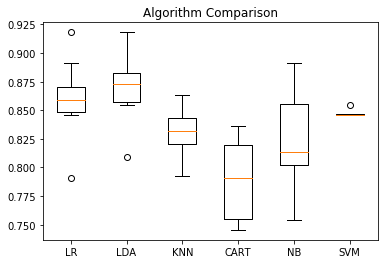

In [41]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [42]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [43]:
# DecisionTreeClassifier(criterion='gini')---->default
# DecisionTreeClassifier(criterion='entropy')

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7608695652173914
[[258  42]
 [ 46  22]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       300
           1       0.34      0.32      0.33        68

    accuracy                           0.76       368
   macro avg       0.60      0.59      0.59       368
weighted avg       0.76      0.76      0.76       368



In [44]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=30,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=30)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

accuracy score: [0.79591837 0.81632653 0.7755102  0.81632653 0.81632653 0.79591837
 0.7755102  0.83673469 0.81632653 0.79591837 0.7755102  0.81632653
 0.83673469 0.81632653 0.79591837 0.7755102  0.79591837 0.81632653
 0.79591837 0.83673469 0.81632653 0.81632653 0.81632653 0.79591837
 0.87755102 0.79591837 0.83673469 0.87755102 0.85714286 0.83673469]
mean score: 0.8142857142857144
stn deviation: 0.026530612244897965
Y prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (1470,)


array([[1178,   55],
       [ 218,   19]], dtype=int64)

In [48]:
# k=10
dtc=KNeighborsClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7961956521739131
[[291   9]
 [ 66   2]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       300
           1       0.18      0.03      0.05        68

    accuracy                           0.80       368
   macro avg       0.50      0.50      0.47       368
weighted avg       0.70      0.80      0.73       368



In [49]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8152173913043478
[[300   0]
 [ 68   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       300
           1       0.00      0.00      0.00        68

    accuracy                           0.82       368
   macro avg       0.41      0.50      0.45       368
weighted avg       0.66      0.82      0.73       368



In [50]:
from sklearn.externals import joblib

joblib_file = "joblib_svc.pkl"             # Save to file in the current working directory
joblib.dump(svc, joblib_file)
joblib_svc = joblib.load(joblib_file)      # Load from file
score = joblib_svc.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for Support Vector Classification: {0:.2f} %".format(100 * score))

Test score for Support Vector Classification: 81.52 %


Conclusion - Support Vector Classification gives best score as 81.52 %

Below are the list of features because of which Employee Attrition is affecting :-
WorkLifeBalance ;
YearsInCurrentRole ;      
YearsSinceLastPromotion ;
PerformanceRating ;
StandardHours ;
OverTime ;
EmployeeCount ;
JobLevel.